## Ploting the time points for longitudinal converters as  they progressed to clinically significant RA

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)




In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 5, repr.plot.height = 5)

In [4]:
# reading the metadatfile 
master_meta=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/Figure_input_files/ALTRA_Fig1_Master_meta_bri_Updated
                    .csv")
master_meta%>%head(3)

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1


In [5]:
# Subset df based on the status column for Plotting 
altra_Long<- master_meta %>%
  filter(Status_Long %in% c("pre", "conversion"))

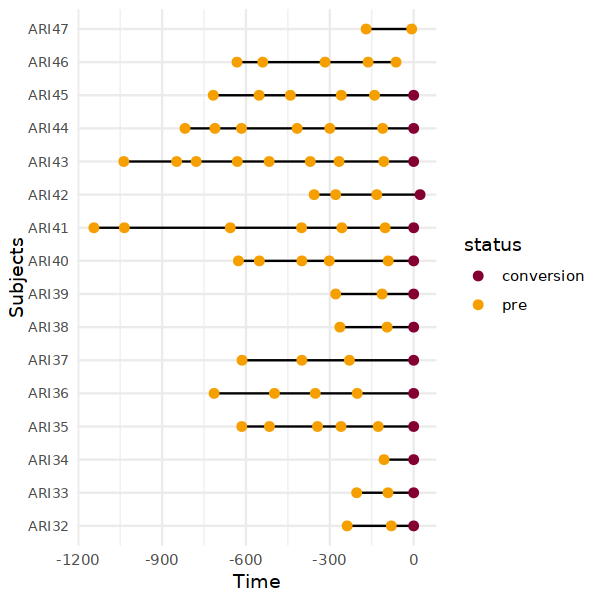

In [6]:
options(repr.plot.width =5, repr.plot.height = 5)
pal2=c("#840032","#F59F00")
pl=ggplot(altra_Long, aes(x = time, y = s1_ids, group = subject.subjectGuid)) +
  geom_line() +
  geom_point(aes(color = status), size = 2) +
  #scale_x_continuous(breaks = seq(0, 1700, by = 250)) +  # Set custom breaks for x-axis
  theme_minimal() +
  labs(x = "Time", y = "Subjects") +
  theme(axis.text.y = element_text(size = 8)) +
  scale_color_manual(values = pal2)
pl

In [7]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_1B_Long.pdf", plot = pl, width = 5, height = 5, units = "in")


In [8]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] plotly_4.10.4               knitr_1.47                 
 [3] ggpubr_0.6.0                SeuratDisk_0.0.0.9021      
 [5] SingleCellExperiment_1.22.0 SummarizedExperiment_1.30.2
 [7] Biobase_2.60.0              GenomicRanges_1.52.1       
 [9] GenomeInfoDb_1.36.4         IRange